# Example of shear-wave splitting applied to an SKS arrival

This example shows how the code can be applied to undertake shear-wave splitting analysis on SKS data. 


The data is from: 

J Asplet, J Wookey, M Kendall. (2020) "A potential post-perovskite province in D″ beneath the Eastern Pacific: evidence from new analysis of discrepant SKS–SKKS shear-wave splitting". GJI.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import glob 
import os, sys 
import pandas as pd

## 1. Get event information from auxiliary files (specific to this dataset):

In [3]:
# List event UIDs and station names:
datadir = os.path.join("data","splittingsample","data")
fnames_all_tmp = glob.glob(os.path.join(datadir, "*.BH*"))


In [4]:
# Read in event window and back azimuth data:
aux_data_fname = os.path.join("data","splittingsample", "Sample_SKS_SKKS_data.sdb")
aux_data_df = pd.read_csv(aux_data_fname, delimiter=" ")


## Perform shear-wave splitting on event:

<IPython.core.display.Javascript object>


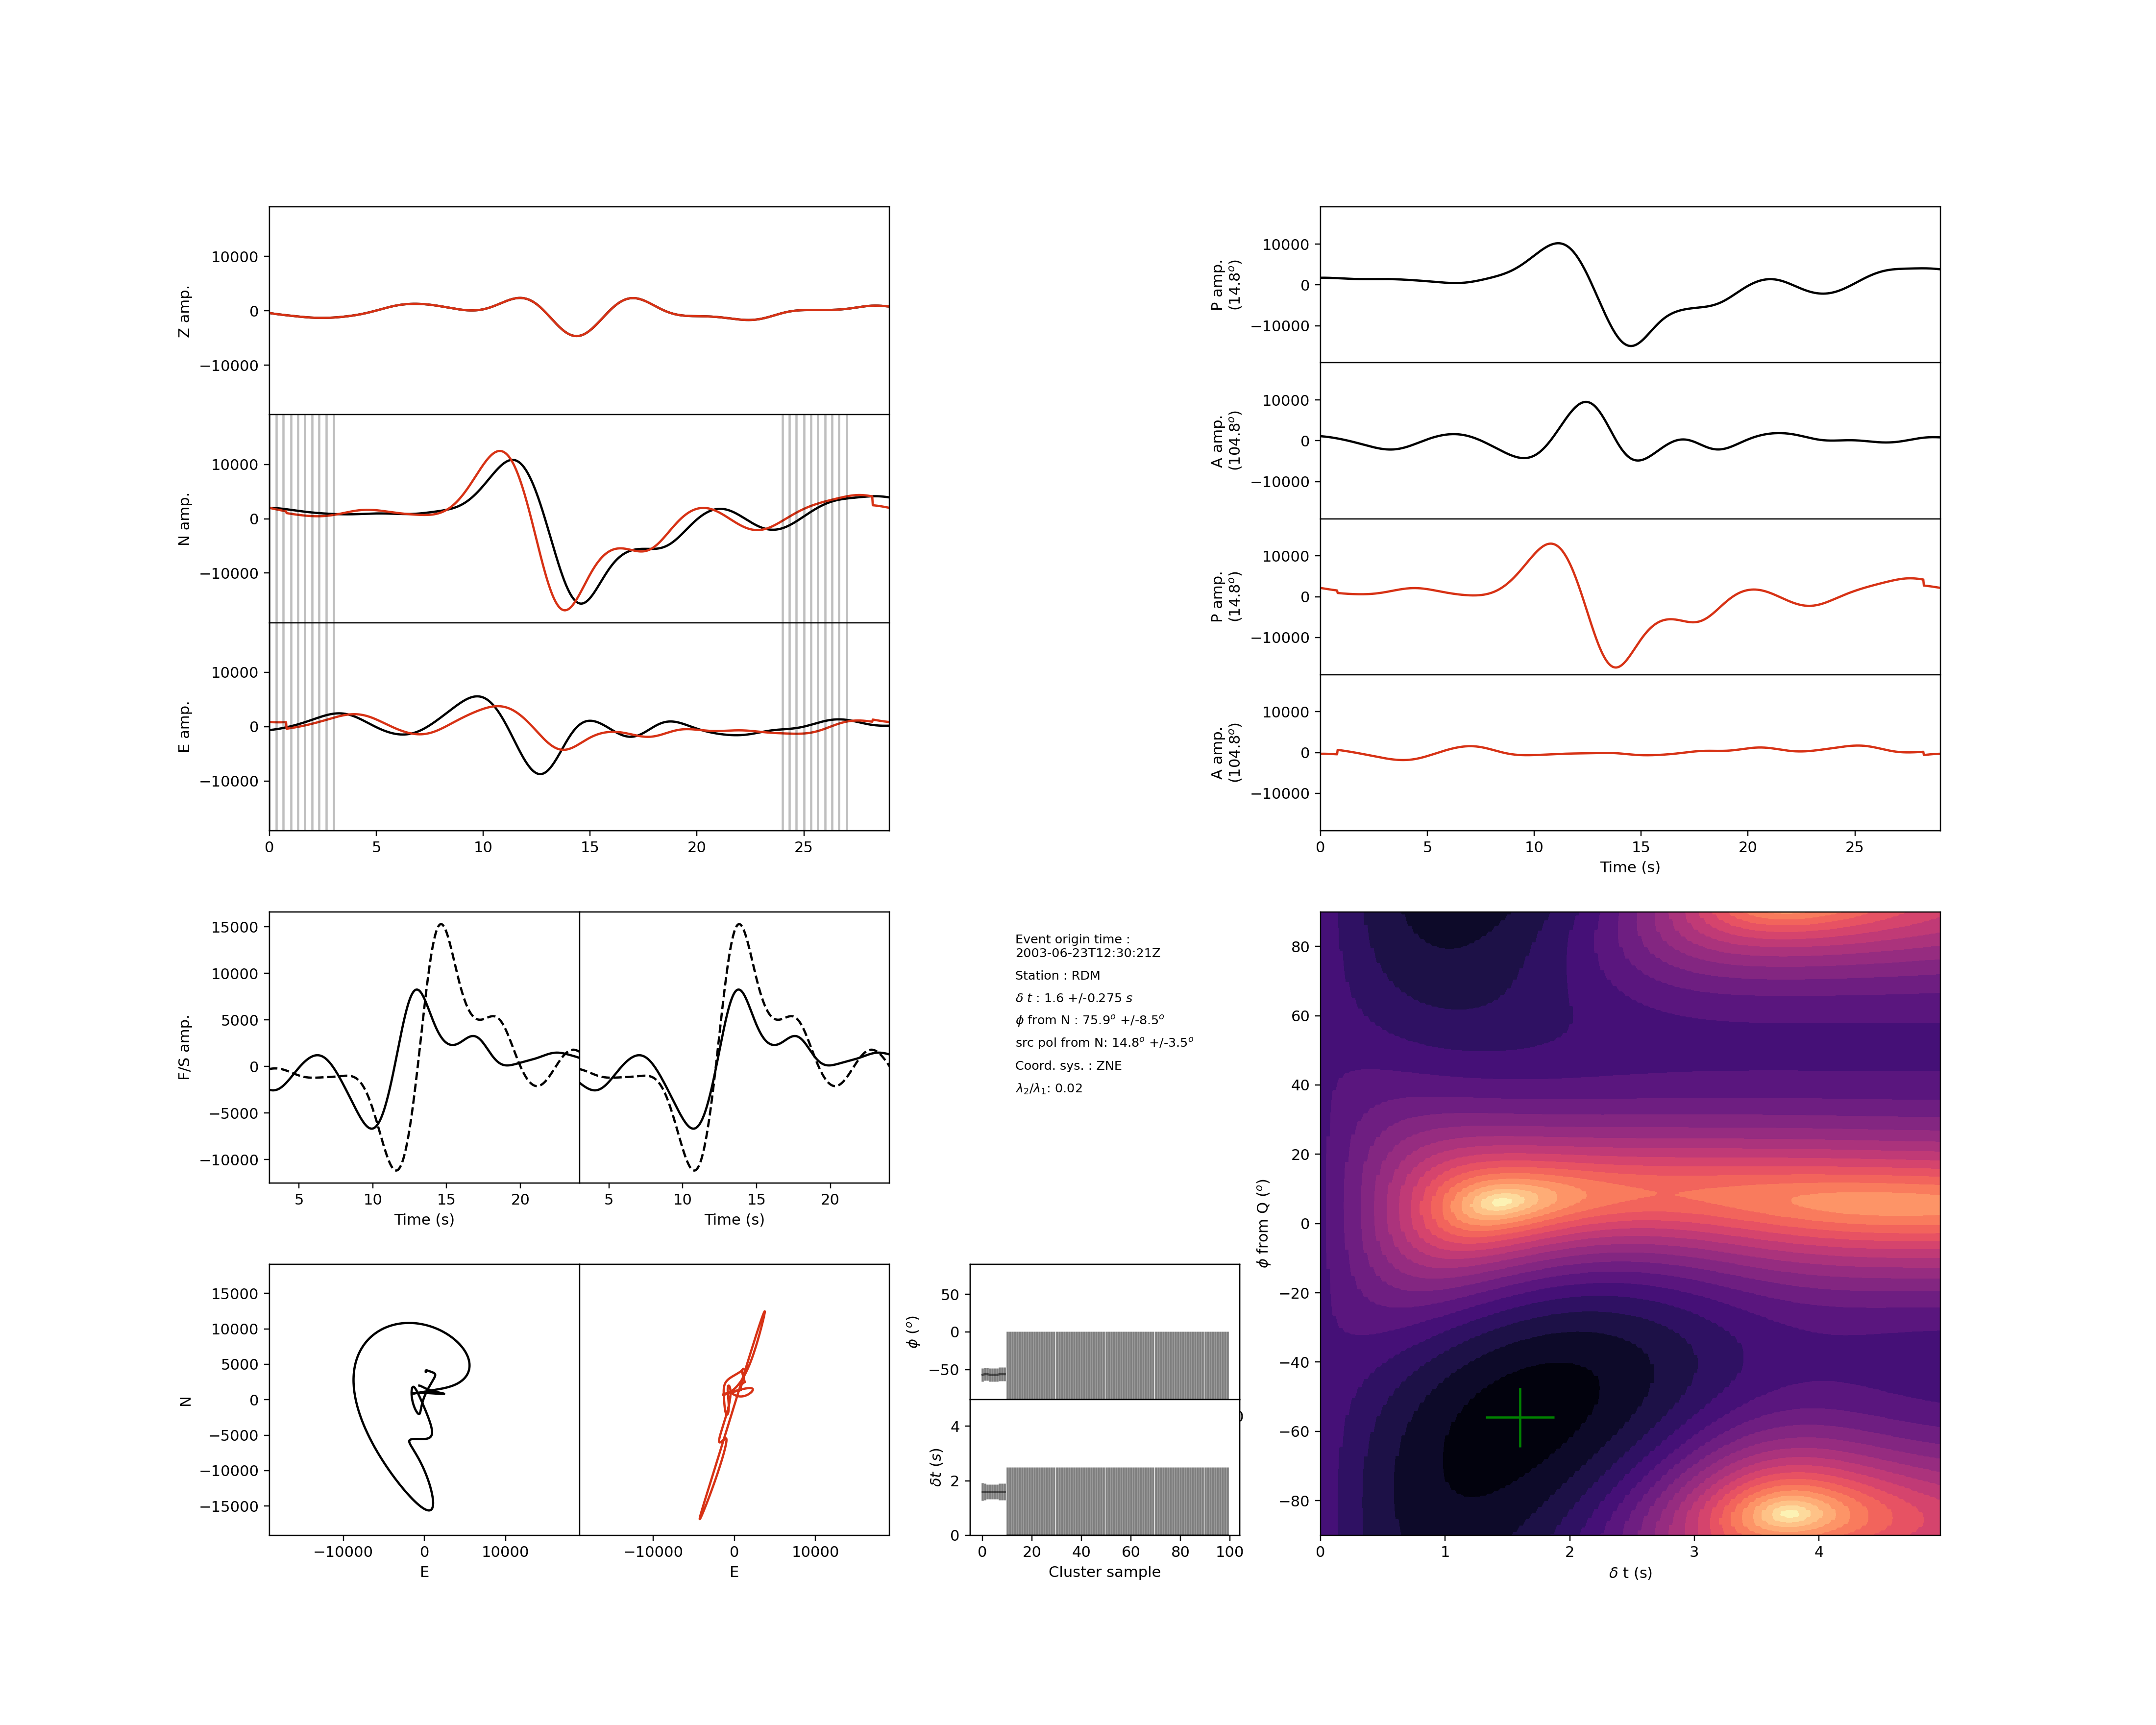

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1653: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


Saved sws result to: outputs/data/RDM_2003174_121231_ScS_sws_result.csv


In [7]:

# And get data for specific station:
station_to_analyse = "RDM"
event_uid = "RDM_2003174_121231_ScS"
# Specify key parameters read in by splitting class:
stations_in = [station_to_analyse]
aux_data_df_row_idx = aux_data_df.index[aux_data_df["STAT"]==station_to_analyse].tolist()[0]
event_starttime = obspy.UTCDateTime(year=int(event_uid.split("_")[1][0:4]), julday=int(event_uid.split("_")[1][4:7]), 
                                        hour=int(event_uid.split("_")[2][0:2]), minute=int(event_uid.split("_")[2][2:4]),
                                       second=int(event_uid.split("_")[2][4:6]))
S_phase_arrival_times = [event_starttime + aux_data_df["WBEG"][aux_data_df_row_idx]]
back_azis_all_stations = [aux_data_df["BAZ"][aux_data_df_row_idx]]
receiver_inc_angles_all_stations = [0.0] # Assume coming in vertically
win_starttime = S_phase_arrival_times[0] - 5
win_endtime = event_starttime + aux_data_df["WEND"][aux_data_df_row_idx] +5

# Load data:
mseed_path = os.path.join(datadir, event_uid+".*")
downsample_factor = 1 #4 #5 #10 # Factor to downsample data by (for faster slitting)
load_wfs_obj = swspy.io.load_waveforms(mseed_path, archive_vs_file="file", downsample_factor=downsample_factor)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [0.01, 0.5]
st = load_wfs_obj.read_waveform_data()

# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st, event_uid=event_uid, stations_in=stations_in, S_phase_arrival_times=S_phase_arrival_times, back_azis_all_stations=back_azis_all_stations, receiver_inc_angles_all_stations=receiver_inc_angles_all_stations) 
splitting_event.overall_win_start_pre_fast_S_pick = 4.0
splitting_event.win_S_pick_tolerance = 1.0
splitting_event.overall_win_start_post_fast_S_pick = (win_endtime - win_starttime) - 10 
splitting_event.rotate_step_deg = 1.0 
splitting_event.max_t_shift_s = 5.0
splitting_event.n_win = 10
splitting_event.perform_sws_analysis(coord_system="ZNE", sws_method="EV")#, sws_method="EV_and_XC") 
# And plot splitting result:
splitting_event.plot(outdir=os.path.join("outputs", "plots"))

# And save result to file:
splitting_event.save_result(outdir=os.path.join("outputs", "data"))


    
